In [4]:
import sys
!{sys.executable} -m pip install xgboost

In [5]:
# importing necessary libraries in jupyter notebook/ -Monir
import pandas as pd
import numpy as np
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import re, string # using to remove regular expression, special characters in the csv files/ -Monir

In [6]:
import matplotlib

In [7]:
# importing csv files to the repositery as data frames/ -Monir
monir_df_fake = pd.read_csv("Fake.csv")
monir_df_true = pd.read_csv("True.csv")

In [8]:
monir_df_fake.head(5) # see how the data in the fake.cse file look like/ Monir

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
monir_df_true.head(5) # see how the data in the true.cse file look like/ Monir

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
monir_df_fake.shape, monir_df_true.shape # find number of rows and columns/ Monir

((23481, 4), (21417, 4))

In [11]:
monir_df_fake["class"] = 0
monir_df_true["class"] = 1

In [12]:
rdf_fake = monir_df_fake.sample(n=100) # generating random sample of 100 number of rows from fake dataframe/ Monir
rdf_true = monir_df_true.sample(n=100) # generating random sample of 100 number of rows from true dataframe/ Monir

In [13]:
rdf_fake.head(5)

,title,text,subject,date,class
15303,HILARIOUS: TRUMP EXPOSES STUPIDITY OF NBC PUPP...,Trump made sure everyone got a chance to see h...,politics,"Aug 19, 2015",0
7666,Fox News’ Attack On Bernie Sanders Hilariousl...,"On February 25th, Fox News Business brought on...",News,"March 6, 2016",0
4240,WATCH: Obama PERFECTLY Mocks Trump’s Insane F...,Conservative radio show host Alex Jones recent...,News,"October 12, 2016",0
20769,OBAMA’S EPA GESTAPO TO SKIP Hearing On CO Mine...,Priorities priorities Arizona Sen. John McCain...,left-news,"Apr 7, 2016",0
8960,Trevor Noah Compares Texans Excited About Ope...,Trevor Noah compared the excitement of the peo...,News,"January 5, 2016",0


In [14]:
rdf_true.head(5)

,title,text,subject,date,class
21011,Taiwan appoints new premier to drive reform ef...,TAIPEI (Reuters) - Taiwan has appointed as pre...,worldnews,"September 5, 2017",1
11313,Russia's Putin registers re-election bid,MOSCOW (Reuters) - President Vladimir Putin fo...,worldnews,"December 27, 2017",1
17645,U.S. believes current North Korea nuclear thre...,WASHINGTON (Reuters) - White House Chief of St...,worldnews,"October 12, 2017",1
2400,U.S. Senator Hatch says 25 percent corporate r...,WASHINGTON (Reuters) - Congressional Republica...,politicsNews,"July 31, 2017",1
6279,Boeing CEO sees 'near term' plane deal after T...,(Reuters) - Boeing Co’s chief executive said o...,politicsNews,"January 17, 2017",1


In [15]:
rdf_fake.shape, rdf_true.shape # find number of rows and columns/ Monir

((100, 5), (100, 5))

In [16]:
monir_df_fake = monir_df_fake.drop(rdf_fake.index) # removing rows of random sample from fake dataframe/ Monir
monir_df_true = monir_df_true.drop(rdf_true.index)  # removing rows of random sample from true dataframe/ Monir

In [17]:
monir_df_fake.shape, monir_df_true.shape, rdf_fake.shape, rdf_true.shape # find  number of rows and columns/ Monir

((23381, 5), (21317, 5), (100, 5), (100, 5))

In [18]:
df_for_manual_testing_sample = pd.concat([rdf_fake, rdf_true], axis=0) # Combining/merging DataFrames with Pandas/ Monir 

In [19]:
df_for_manual_testing_sample.to_csv("manual_testing_sample.csv") # Saving as csv file/ Monir 

In [20]:
df_merge_all = pd.concat([monir_df_fake, monir_df_true], axis=0) # Combining/merging DataFrames with Pandas/ Monir 

In [21]:
df_merge_all.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [22]:
df_to_use = df_merge_all.drop(["title", "subject", "date"], axis=1) #drop columns from pandas dataframe/ Monir 

In [23]:
df_to_use.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [24]:
df_to_use = df_to_use.sample(frac=1) # Shuffle DataFrame rows/ Monir

In [25]:
df_to_use.head(10)

,text,class
2901,CHICAGO (Reuters) - A Democratic plan to end I...,1
17790,Wow! These Texas Democratic congresswomen are ...,0
19548,"BERLIN (Reuters) - More than 1,500 police will...",1
4713,The last thing this country needs right now is...,0
7874,WASHINGTON (Reuters) - Republican presidential...,1
20047,WASHINGTON (Reuters) - U.S. officials are aggr...,1
9252,"Now, a Clinton appointed judge who took Flynn ...",0
3406,WASHINGTON (Reuters) - U.S. Vice President Mik...,1
7858,CHICAGO (Reuters) - Chicago Mayor Rahm Emanuel...,1
2347,MOSCOW (Reuters) - Russia may impose counter-m...,1


In [26]:
df_to_use.isnull().sum() # check out wheather null value available/ Monir

text     0
class    0
dtype: int64

In [27]:
# define a function for removing unnecessary/special characters and return a lower case plain texts/ Monir
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+ |www\.\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [28]:
df_to_use["text"]=df_to_use["text"].apply(word_drop) # apply the function 

In [29]:
df_to_use.head(10)


,text,class
2901,chicago reuters a democratic plan to end i...,1
17790,wow these texas democratic congresswomen are ...,0
19548,berlin reuters more than police will be ...,1
4713,the last thing this country needs right now is...,0
7874,washington reuters republican presidential...,1
20047,washington reuters u s officials are aggr...,1
9252,now a clinton appointed judge who took flynn ...,0
3406,washington reuters u s vice president mik...,1
7858,chicago reuters chicago mayor rahm emanuel...,1
2347,moscow reuters russia may impose counter m...,1


In [30]:
x = df_to_use["text"]
y = df_to_use["class"]

In [31]:
#Split a Dataframe into Train and Test Set where test size is 1/4 / Monir
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25) 

In [32]:
# For Converting a collection of raw documents to a matrix of TF-IDF features/ Monir
from sklearn.feature_extraction.text import TfidfVectorizer 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [33]:
My_vec = TfidfVectorizer()
x_vec_train = My_vec.fit_transform(x_train)
x_vec_test = My_vec.transform(x_test)

 ### classification using logistic regression

In [34]:
# Logistic Regression classifier/ Monir
from sklearn.linear_model import LogisticRegression

In [35]:
LR_C = LogisticRegression()
LR_C.fit(x_vec_train, y_train)

LogisticRegression()

In [36]:
LR_C.score(x_vec_test, y_test)

0.9869351230425056

In [37]:
Pred_LR_C = LR_C.predict(x_vec_test)

In [38]:
print(classification_report(y_test, Pred_LR_C)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.98      0.99      0.99      5297

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



### classification with Decision Tree

In [39]:
# Logistic Regression classifier/ Monir
from sklearn.tree import DecisionTreeClassifier

In [40]:
DT_C = LogisticRegression()
DT_C.fit(x_vec_train, y_train)

LogisticRegression()

In [41]:
DT_C.score(x_vec_test, y_test)

0.9869351230425056

In [42]:
Pred_DT_C = LR_C.predict(x_vec_test)

In [43]:
print(classification_report(y_test, Pred_DT_C))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.98      0.99      0.99      5297

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



### classification with gradient boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [45]:
GB_C = GradientBoostingClassifier(random_state=0)
GB_C.fit(x_vec_train, y_train)

GradientBoostingClassifier(random_state=0)

In [46]:
GB_C.score(x_vec_test, y_test)

0.9943624161073825

In [47]:
Pred_GB_C = GB_C.predict(x_vec_test)

In [48]:
print(classification_report(y_test, Pred_GB_C))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5878
           1       0.99      1.00      0.99      5297

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



### classification with Randm Forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RF_C = RandomForestClassifier(random_state=0)
RF_C.fit(x_vec_train, y_train)

RandomForestClassifier(random_state=0)

In [51]:
RF_C.score(x_vec_test, y_test)

0.988993288590604

In [52]:
Pred_RF_C = RF_C.predict(x_vec_test)

In [53]:
print(classification_report(y_test, Pred_RF_C))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.99      0.99      0.99      5297

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



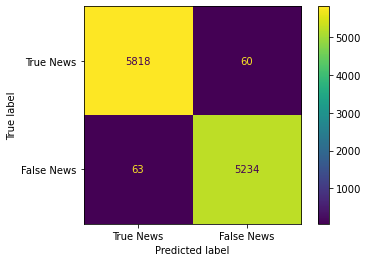

In [54]:
plot_confusion_matrix(RF_C, x_vec_test, y_test, values_format='d', display_labels=["True News", "False News"])

#### classification with XGBoost

In [55]:
XGB_C = XGBClassifier(random_state=0)
XGB_C.fit(x_vec_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
XGB_C.score(x_vec_test, y_test)

0.9971364653243848

In [57]:
Pred_XGB_C = XGB_C.predict(x_vec_test)

In [58]:
print(classification_report(y_test, Pred_RF_C))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.99      0.99      0.99      5297

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



### manually cheak out classifier prediction 

In [59]:
def output_lebel(n):
    if n==0:
        return "This is a Fake news"
    elif n == 1:
        return "This is NOT a Fake news"

In [60]:
def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(word_drop)
    new_x_test = new_def_test["text"]
    new_xv_test = My_vec.transform(new_x_test)

    Pred_LR_C = LR_C.predict(new_xv_test)
    Pred_GB_C = GB_C.predict(new_xv_test)
    Pred_RF_C = RF_C.predict(new_xv_test)
    
    return print("\n\nLRC Prediction: {} \nGBC Preiction: {} \nRFC Preiction: {}".format(output_lebel(Pred_LR_C),
                                                                                         output_lebel(Pred_GB_C),
                                                                                         output_lebel(Pred_RF_C)))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)